<a href="https://colab.research.google.com/github/brunobarroca/data-science/blob/main/Analise_de_Dados_do_Airbnb_Tokyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 **Projeto prático**

*by [Bruno Barroca](https://www.linkedin.com/in/brunobarroca/)*

----

## Sobre os dados

### Análise dos Dados do Airbnb - Tokyo

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## **Obtenção dos Dados**

Fonte dos dados:  [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Para realizar a análise, será baixado o seguinte arquivo:

- `listings.csv` - *Summary information and metrics for listings in Toronto (good for visualisations).*



**Bibliotecas utlizadas para Projeto**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Importação do arquivo**

In [16]:
df = pd.read_csv('/content/listings.csv')

## **Análise de Dados**

A etapa tem como objetivo fornecer avaliar os dados disponíveis.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Conhecendo o *dataset* através das primeiras 5 entradas.

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,NaN,28,6,2017-08-07,0.05,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,NaN,180,167,2013-08-27,0.85,2,0,0,NaN
2,26654,"World Class @ CN Tower, convention centre, The...",113345,Adela,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,133.0,28,45,2025-02-01,0.25,3,140,2,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,75.0,365,31,2025-01-01,0.16,1,11,1,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,NaN,180,1,2010-08-11,0.01,2,0,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [21]:
# Atributos e entradas do dataset
print("O conjunto possui um total de",df.shape[0],"entradas e um total de",df.shape[1], "atributos.")

O conjunto possui um total de 21468 entradas e um total de 18 atributos.


In [22]:
# Quais os tipos de variáveis?
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [28]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
 (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
neighbourhood_group,1.000000
license,0.515838
price,0.263602
reviews_per_month,0.226057
last_review,0.226057
host_name,0.000745
name,0.000000
id,0.000000
neighbourhood,0.000000
host_id,0.000000


Nota-se que no *dataset* existem seis variáveis que apresentam valores ausentes, sendo elas:

1. neighbourhood_group - 100% de nulidade (dados ausentes).
2. license - mais de 50% dos dados estão ausentes.
3. price, last_review e reviews_per_month - apresentam, aproximadamente, de 20~26% de valores ausentes.
4. host_name - apesar do percentual baixo, a variável ainda possui valores ausente.s

### **Q3. Qual o tipo de distribuição das variáveis?**

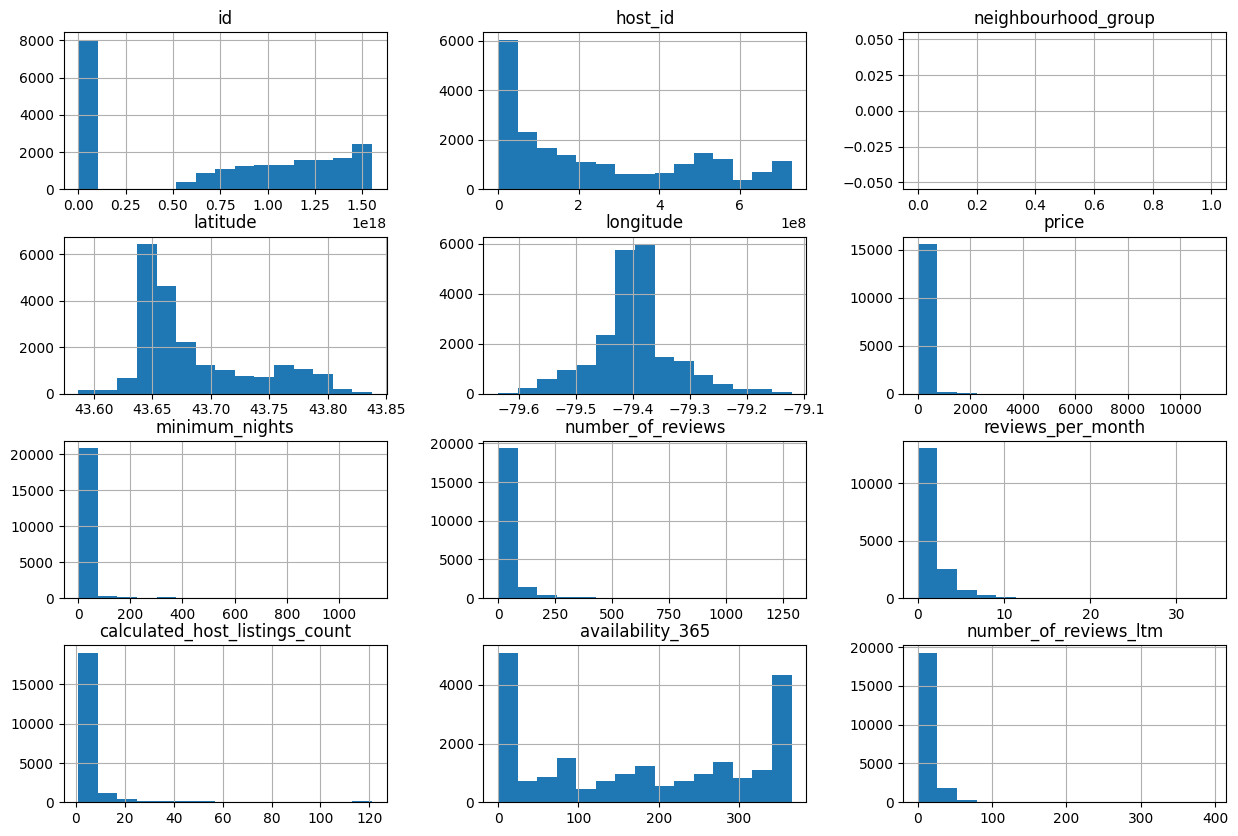

In [30]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

A moeda do Japão chama-se **Iene Japonês - JPY.**

Para esta análise, será utilizado a variável `price` que retrata os preços para alugar os imóveis.

In [38]:
# ver a média da coluna `price`
print(f'A média dos preços de aluguel em Tokyo é de {df.price.mean():.2f} ienes.')

A média dos preços de aluguel em Tokyo é de 176.30 ienes.


### **Q4. Qual a correlação existente entre as variáveis**

A correlação carrega o significado de duas variáveis estarem mais próximas ou mais distantes uma da outra. De fato, o entendimento é saber se a uma relação entre duas coisas.

Para a análise, será considerado apenas os campos que são do tipo valor (*int64*, *float64*, ...).

In [46]:
# criar a matriz de correlação
matriz_correlacao = df[['id', 'host_id', 'latitude',
                        'longitude', 'price', 'minimum_nights',
                        'number_of_reviews', 'reviews_per_month','calculated_host_listings_count',
                        'availability_365', 'number_of_reviews_ltm']].corr()

# mostrar a matriz de correlação
matriz_correlacao

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.534585,0.045465,0.013082,0.008874,-0.156167,-0.261966,0.371093,0.098394,0.282758,0.137921
host_id,0.534585,1.000000,0.072510,0.023188,0.025242,-0.117240,-0.121609,0.303014,-0.015773,0.150764,0.138090
latitude,0.045465,0.072510,1.000000,0.311360,-0.106725,-0.000730,-0.097678,-0.119195,0.102729,0.073572,-0.101061
longitude,0.013082,0.023188,0.311360,1.000000,0.012887,0.009819,-0.001189,0.004593,-0.075793,0.009347,-0.008426
price,0.008874,0.025242,-0.106725,0.012887,1.000000,0.014594,-0.010292,0.034049,-0.077306,0.016104,0.012232
minimum_nights,-0.156167,-0.117240,-0.000730,0.009819,0.014594,1.000000,-0.109833,-0.252941,0.031349,0.006446,-0.242311
number_of_reviews,-0.261966,-0.121609,-0.097678,-0.001189,-0.010292,-0.109833,1.000000,0.442549,-0.097388,-0.008061,0.576243
reviews_per_month,0.371093,0.303014,-0.119195,0.004593,0.034049,-0.252941,0.442549,1.000000,-0.144939,0.046309,0.777947
calculated_host_listings_count,0.098394,-0.015773,0.102729,-0.075793,-0.077306,0.031349,-0.097388,-0.144939,1.000000,0.035587,-0.112810
availability_365,0.282758,0.150764,0.073572,0.009347,0.016104,0.006446,-0.008061,0.046309,0.035587,1.000000,0.011489


***heatmap*** **com Seaborn**

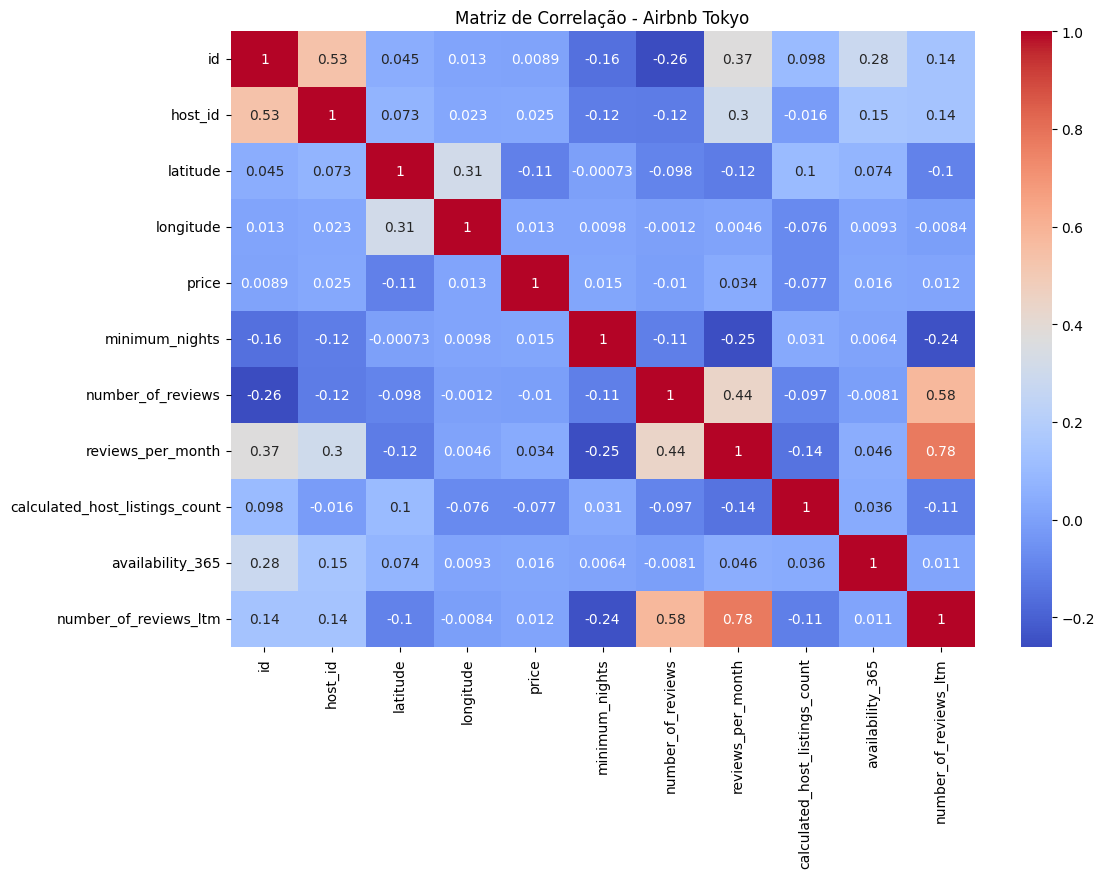

In [48]:
# plotar o gráfico heatmap a partir das correlações
plt.figure(figsize=(12,8))
sns.heatmap(df[['id', 'host_id', 'latitude',
                        'longitude', 'price', 'minimum_nights',
                        'number_of_reviews', 'reviews_per_month','calculated_host_listings_count',
                        'availability_365', 'number_of_reviews_ltm']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Airbnb Tokyo')
plt.show()

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Para esta análise, será utilizado a variável `room_type` que retrata os tipos de imóveis disponíveis em Tokyo para locação.

In [51]:
# quantidade do tipo de imóvel mais alugado no Airbnb
df.room_type.value_counts()

,count
room_type,
Entire home/apt,14196
Private room,7187
Shared room,68
Hotel room,17


In [78]:
# percentual do tipo de imóvel mais alugado no Airbnb
(df.room_type.value_counts() / df.shape[0]).sort_values(ascending=False) *100

,count
room_type,
Entire home/apt,66.126328
Private room,33.477734
Shared room,0.316751
Hotel room,0.079188


A distribuição é bem dispersa em os 4 tipos de locação. Predominantemente, os tipos de imóvel mais alugados são `Entire home/apt`e `Private room`. `Shared room`e `Hotel room` não compõem nem 1% dos dados.

O que nos leva a entender que há uma certa preferência pelo tipo por quem vai alugar o imóvel.

### **Q6. Qual a localidade mais cara de Tokyo?**

Para responder nosso questionamento é necessário abordar as variáveis `neighborhood` e `price`. Desta forma, conseguimos através da função *groupby*, buscar a média da localidade para que possamos descobrir qual é a mais cara.

In [57]:
# ver preços por bairros, na média
df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Scarborough Village,657.294118
Bridle Path-Sunnybrook-York Mills,650.333333
Princess-Rosethorn,334.222222
Forest Hill South,293.390244
Waterfront Communities-The Island,255.120196
Niagara,243.564374
Playter Estates-Danforth,233.815789
Moss Park,231.582245
The Beaches,228.343750


Podemos identificar que os bairros de `Scarborough Village`e `Bridle Path-Sunnybrook-York Mills` estão com os preços médios acima do praticado nos demais bairros de Tokyo.



In [75]:
# Representatividade dos bairros mais caros da amostra
print(f'Representatividade dos bairros com valores médios acima dos demais: {df[df.neighbourhood.isin(['Scarborough Village', 'Bridle Path-Sunnybrook-York Mills'])].shape[0] / df.shape[0] * 100:.1f}%.')

Representatividade dos bairros com valores médios acima dos demais: 0.2%.


Nem sempre os dados vão nos dizer algo com total exatidão. No exemplo acima, os bairros mais caros representam um volume, aproximadamente, de 0,2% do total.

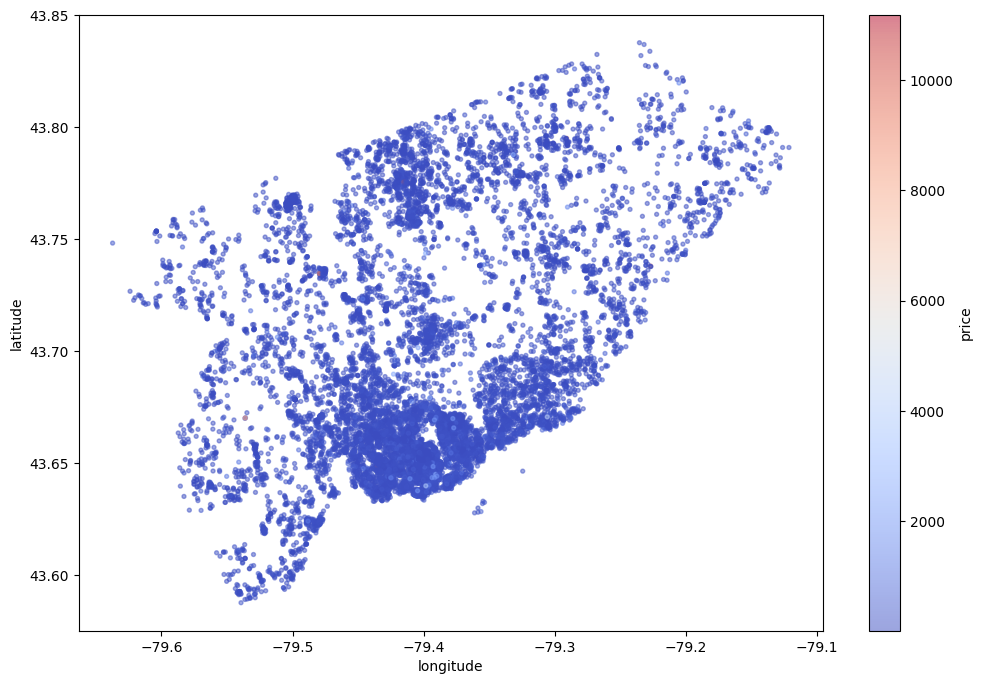

In [90]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', figsize=(12,8),
        c='price', alpha=0.5, s=8, cmap='coolwarm')
plt.show();

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [92]:
# ver a média da coluna `minimum_nights``
print(f'A média de noites mínima por locação alugada em Tokyo é de {df.minimum_nights.mean():.2f}.')

A média de noites mínima por locação alugada em Tokyo é de 25.36.


## **Conclusão**

Foi realizado a análise exploratória dos dados e, como proposta acima, foi realizado e um conjunto de dados sumarizado, ou seja, resumido.

Porém, de forma lógica, é possível entender alguns pontos apenas realizando esta análise inicial. Sendo eles:

- Os dados ausentes representam inconsistência nos dados. Deve haver uma análise mais profunda para identificar a utilidade das variáveis com nulidade ou não.
- A média mínima de noites para ser alugada é de 25 noites. O que demonstra que as locações fechadas, possivelmente, são para 1 mês.
-  A localidade mais cara de Tokyo não condiz com os preços médios praticados, porém, existem sob um volume de locações baixíssimo. De forma interpretativa, isso leva ao entendimento que nem sempre a base de dados nos dará exatidão nos contextos.
- Com a correlão de matrizes, os dados apontam uma distribuição sem fatores dominante. Sendo possível enxerga que existe uma correlação forte entre as variáveis `number_of_reviews`e `number_of_reviews_ltm`.
- A média de um aluguel em Tokyo gira, em torno, de 176.30 ienes.